import library

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import pandas as pd
import os
from sklearn import svm
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage.feature import hog, local_binary_pattern
from PIL import Image
from sklearn.metrics import confusion_matrix

In [ ]:
folder_input = 'jaffe_db'
path = 'jaffe/'

In [ ]:
# List all files in the folder
files = glob.glob(os.path.join(folder_input, '*'))

In [ ]:
for file in files:
    base_name, file_extention = os.path.splitext(file)
    print(f'File: {file}, file_extention{file_extention}') #check image typedata

File: jaffe_db\KA.AN1.39.tiff, file_extention.tiff
File: jaffe_db\KA.AN2.40.tiff, file_extention.tiff
File: jaffe_db\KA.AN3.41.tiff, file_extention.tiff
File: jaffe_db\KA.DI1.42.tiff, file_extention.tiff
File: jaffe_db\KA.DI2.43.tiff, file_extention.tiff
File: jaffe_db\KA.DI3.44.tiff, file_extention.tiff
File: jaffe_db\KA.FE1.45.tiff, file_extention.tiff
File: jaffe_db\KA.FE2.46.tiff, file_extention.tiff
File: jaffe_db\KA.FE3.47.tiff, file_extention.tiff
File: jaffe_db\KA.FE4.48.tiff, file_extention.tiff
File: jaffe_db\KA.HA1.29.tiff, file_extention.tiff
File: jaffe_db\KA.HA2.30.tiff, file_extention.tiff
File: jaffe_db\KA.HA3.31.tiff, file_extention.tiff
File: jaffe_db\KA.HA4.32.tiff, file_extention.tiff
File: jaffe_db\KA.NE1.26.tiff, file_extention.tiff
File: jaffe_db\KA.NE2.27.tiff, file_extention.tiff
File: jaffe_db\KA.NE3.28.tiff, file_extention.tiff
File: jaffe_db\KA.SA1.33.tiff, file_extention.tiff
File: jaffe_db\KA.SA2.34.tiff, file_extention.tiff
File: jaffe_db\KA.SA3.35.tiff, 

In [ ]:
# convert tiff to image
# Ensure the output folder exists
if not os.path.exists(path):
    os.makedirs(path)

# List all files in the input folder
file_list = os.listdir(folder_input)

# Loop through the files in the input folder
for filename in file_list:
    if filename.endswith('.tiff') or filename.endswith('.tif'):
        # Construct the full path for the input and output files
        input_path = os.path.join(folder_input, filename)
        output_path = os.path.join(path, os.path.splitext(filename)[0] + '.jpg')

        # Open the TIFF image using Pillow
        tiff_image = Image.open(input_path)

        # Convert the image to RGB mode
        rgb_image = tiff_image.convert('RGB')

        # Save the RGB image as a JPG image in the output folder
        rgb_image.save(output_path, 'JPEG')

        # Close the images (optional, but recommended)
        tiff_image.close()
        rgb_image.close()

print("Conversion complete.")

Conversion complete.


In [ ]:
# List all files in the folder
files = glob.glob(os.path.join(path, '*'))
for file in files:
    base_name, file_extension = os.path.splitext(file)
    print(f"File: {file}, File Extension: {file_extension}")

File: jaffe\KA.AN1.39.jpg, File Extension: .jpg
File: jaffe\KA.AN2.40.jpg, File Extension: .jpg
File: jaffe\KA.AN3.41.jpg, File Extension: .jpg
File: jaffe\KA.DI1.42.jpg, File Extension: .jpg
File: jaffe\KA.DI2.43.jpg, File Extension: .jpg
File: jaffe\KA.DI3.44.jpg, File Extension: .jpg
File: jaffe\KA.FE1.45.jpg, File Extension: .jpg
File: jaffe\KA.FE2.46.jpg, File Extension: .jpg
File: jaffe\KA.FE3.47.jpg, File Extension: .jpg
File: jaffe\KA.FE4.48.jpg, File Extension: .jpg
File: jaffe\KA.HA1.29.jpg, File Extension: .jpg
File: jaffe\KA.HA2.30.jpg, File Extension: .jpg
File: jaffe\KA.HA3.31.jpg, File Extension: .jpg
File: jaffe\KA.HA4.32.jpg, File Extension: .jpg
File: jaffe\KA.NE1.26.jpg, File Extension: .jpg
File: jaffe\KA.NE2.27.jpg, File Extension: .jpg
File: jaffe\KA.NE3.28.jpg, File Extension: .jpg
File: jaffe\KA.SA1.33.jpg, File Extension: .jpg
File: jaffe\KA.SA2.34.jpg, File Extension: .jpg
File: jaffe\KA.SA3.35.jpg, File Extension: .jpg
File: jaffe\KA.SU1.36.jpg, File Extensio

In [ ]:
output_jaffe = 'output_jaffe/'
expres_code = ['NE','HA','AN','DI','FE','SA','SU']
expressions = [ 0,   1,   2,   3,   4,   5,   6]

In [ ]:
# Ensure the output folder exists
if not os.path.exists(output_jaffe):
    os.makedirs(output_jaffe)

In [ ]:
face_detector =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def preprocessing(dir_path):
    img_list = os.listdir(dir_path)
    count=0
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        label = img[3:5]  # each name of image have 2 char for label from index 3-5
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(input_img, 1.3, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(input_img, (x,y), (x+w,y+h), (0,0,0), 2)
            count += 1
            face_roi=input_img[y:y+h,x:x+w]
            face_roi = cv2.resize(face_roi,(128,128))
        # Save the captured image into the datasets folder
            cv2.imwrite("output_jaffe/img." + str(label) + '.' +
                    str(count) + ".jpg",face_roi )

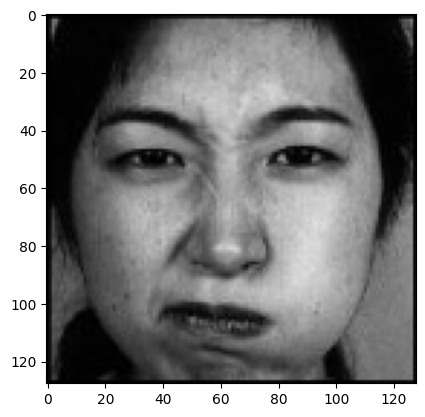

In [ ]:
image_directory = 'output_jaffe/'

# List image files in the directory
file_images = os.listdir(image_directory)
select_image = file_images

if not select_image:
    print("No image files found in the directory.")
else:
    # Choose the first image in the list (change the index as needed)
    selected_filename_image = select_image[0]

    # Create the full path to the selected image
    selected_image_path = os.path.join(image_directory, selected_filename_image)

    # Try to load and display the selected image
    selected_image = cv2.imread(selected_image_path)

    if selected_image is not None:
        plt.imshow(selected_image)
    else:
        print(f"Could not open or read the selected image at {selected_image_path}.")

In [ ]:
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img, cv2.IMREAD_GRAYSCALE)
        img_data_list.append(input_img)
        label = img[4:6]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

In [ ]:
X, Y, img_names = read_data(output_jaffe)
img_x=np.array(X)
img_x.shape

[[[  0   3   1 ...   3   0   1]
  [  5   5  25 ...  22  37   0]
  [  0  29 109 ...  90 121  15]
  ...
  [  0  14  62 ... 115 121   7]
  [  2  18  65 ... 118 120  15]
  [  0   2   8 ...  10  12   0]]

 [[  0   2   0 ...   0   0   0]
  [  0   5  21 ...   1   2   0]
  [  0  20  70 ...   2   2   1]
  ...
  [  0  13  44 ... 116 122  11]
  [  3  13  39 ... 126 129  11]
  [  1   0   9 ...  11  16   1]]

 [[  0   0   1 ...   0   2   0]
  [  0   2  17 ...   1   2   0]
  [  0  20  52 ...   3   4   0]
  ...
  [  0   9  39 ... 123 128   8]
  [  2  11  36 ... 145 134  15]
  [  1   0   8 ...  14  13   0]]

 ...

 [[  2   0   0 ...   0   0   0]
  [  1  15  43 ...  53  56   8]
  [  0  43 119 ... 159 146  18]
  ...
  [  0  29  89 ... 124 131  14]
  [  1  28  76 ... 127 121  15]
  [  0   4   9 ...  15  14   1]]

 [[  0   0   0 ...   2   0   1]
  [  0  21  52 ...  51  61   5]
  [  0  50 133 ... 160 165  22]
  ...
  [  0  33  84 ... 127 135  13]
  [  0  32  79 ... 129 129  17]
  [  1   3  12 ...  17  14  

(213, 128, 128)

# HOG Feature Extraction

In [ ]:
file_images = os.listdir(output_jaffe)

In [ ]:
fd_list = []
hog_list = []
for i in file_images:
    fd, hog_image = hog(cv2.imread(output_jaffe+i), orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True,
                    channel_axis=2)
    fd_list.append(fd)
    hog_list.append(hog_image)

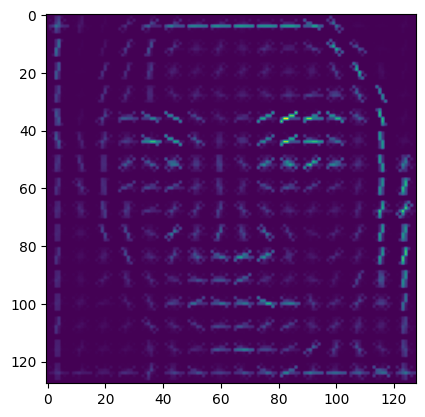

In [ ]:
plt.imshow(hog_list[1])

In [ ]:
list_fd = np.array(fd_list)
list_fd

array([[0.38029456, 0.38029456, 0.29296307, ..., 0.03577505, 0.02127346,
        0.34005554],
       [0.39480346, 0.20687319, 0.14745545, ..., 0.16252068, 0.03208908,
        0.29108922],
       [0.4190697 , 0.03664986, 0.21777534, ..., 0.0714251 , 0.02872264,
        0.30350283],
       ...,
       [0.33114867, 0.00451116, 0.10017284, ..., 0.02626224, 0.0825562 ,
        0.37219269],
       [0.34766015, 0.071206  , 0.05690355, ..., 0.06269642, 0.02372903,
        0.31349027],
       [0.26360446, 0.01596831, 0.13236727, ..., 0.02310798, 0.06766082,
        0.31708094]])

In [ ]:
list_fd.shape

(213, 8100)

In [ ]:
df_fd = pd.DataFrame(list_fd)
df_fd['label'] = Y

In [ ]:
df_fd

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.380295,0.380295,0.292963,0.379128,0.303414,0.107541,0.251298,0.010032,0.380295,0.037715,...,0.390199,0.046474,0.233878,0.015973,0.390199,0.027568,0.035775,0.021273,0.340056,2
1,0.394803,0.206873,0.147455,0.108167,0.394803,0.139714,0.000000,0.057911,0.394803,0.241238,...,0.287896,0.034573,0.172043,0.019285,0.291089,0.203062,0.162521,0.032089,0.291089,2
2,0.419070,0.036650,0.217775,0.082669,0.398344,0.067366,0.103586,0.000000,0.419070,0.085515,...,0.303503,0.024322,0.188714,0.039620,0.303503,0.182636,0.071425,0.028723,0.303503,2
3,0.400378,0.093742,0.177351,0.014538,0.372775,0.017549,0.114520,0.078092,0.400378,0.006501,...,0.334908,0.042098,0.174415,0.028423,0.334908,0.033139,0.081402,0.033567,0.334908,2
4,0.345899,0.301852,0.263582,0.093908,0.345899,0.153239,0.000000,0.004598,0.345899,0.024577,...,0.371913,0.029269,0.285872,0.027772,0.371913,0.047666,0.044192,0.035399,0.269941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.211070,0.009269,0.122516,0.081728,0.320832,0.016552,0.007206,0.001725,0.320832,0.240504,...,0.376576,0.213513,0.185670,0.007532,0.288786,0.179826,0.125648,0.095836,0.282225,6
209,0.318291,0.021050,0.123684,0.079349,0.331179,0.006926,0.002015,0.004931,0.331179,0.230427,...,0.365462,0.161652,0.126336,0.032262,0.365462,0.021298,0.095652,0.029301,0.365462,6
210,0.331149,0.004511,0.100173,0.068404,0.331149,0.027121,0.004391,0.021314,0.277606,0.101132,...,0.412802,0.000000,0.238647,0.016113,0.412802,0.019397,0.026262,0.082556,0.372193,6
211,0.347660,0.071206,0.056904,0.082255,0.347660,0.020267,0.000000,0.000000,0.329825,0.059921,...,0.394496,0.059645,0.226094,0.035079,0.394496,0.051076,0.062696,0.023729,0.313490,6


In [ ]:
df_fd.to_csv('df_hog.csv')

# ULBP Feature Extraction

In [ ]:
def ulbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ulbp_matrix = np.zeros_like(gray, dtype=np.uint8)

    for i in range(1, gray.shape[0] - 1):
        for j in range(1, gray.shape[1] - 1):
            neighbors = [gray[i-1, j-1], gray[i-1, j], gray[i-1, j+1],
                         gray[i,   j+1], gray[i+1, j+1], gray[i+1, j],
                         gray[i+1, j-1], gray[i,   j-1]]

            center = gray[i, j]
            binary_values = [1 if n >= center else 0 for n in neighbors]
            lbp_value = sum([v * (2**idx) for idx, v in enumerate(binary_values)])

            # Check apakah LBP bersifat uniform
            is_uniform = sum(binary_values) <= 2

            ulbp_value = lbp_value if is_uniform else 255  # 255 untuk non-uniform

            ulbp_matrix[i, j] = ulbp_value

    return ulbp_matrix

def process_images_in_folder(folder_path):
    if not os.path.exists('output_ulbp'):
     os.makedirs('output_ulbp')
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            ulbp_result = ulbp(image)

            # Simpan hasil ULBP dalam file teks
            output_path = os.path.join('output_ulbp', f'ulbp_{filename}')
            cv2.imwrite(output_path, ulbp_result)
            # np.savetxt(output_path, ulbp_result, fmt='%d', delimiter=' ')

In [ ]:
process_images_in_folder(output_jaffe)

In [ ]:
def get_images(path):
    label = path.split('.')[1]
    imnpg_ulbp = cv2.imread(path)
    imnpg_ulbp_array = np.array(imnpg_ulbp)
    df_flat = imnpg_ulbp_array.flatten()
    datafram =pd.DataFrame(df_flat).T
    datafram["label"] = label

    return datafram

In [ ]:
all_datas = [get_images("output_ulbp/" + filesname) for filesname in os.listdir("output_ulbp") ]
df_new = pd.concat(datas for datas in all_datas)
df_new

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,AN
0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,2,2,2,0,0,0,AN
0,0,0,0,0,0,0,2,2,2,0,...,0,0,0,1,1,1,0,0,0,AN
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,AN
0,1,1,1,1,1,1,0,0,0,2,...,0,0,0,0,0,0,1,1,1,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,2,2,2,0,0,0,0,...,2,2,2,0,0,0,1,1,1,SU
0,0,0,0,2,2,2,0,0,0,0,...,0,0,0,1,1,1,0,0,0,SU
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,2,2,0,0,0,SU
0,0,0,0,0,0,0,2,2,2,0,...,3,3,3,0,0,0,0,0,0,SU


In [ ]:
df_new.to_csv('df_ulbp.csv')

In [ ]:
imnpg_ulbp="output_ulbp/ulbp_img.SU.21.jpg"
imnpg_ulbp = cv2.imread(imnpg_ulbp)

In [ ]:
imnpg_ulbp_array = np.array(imnpg_ulbp)
imnpg_ulbp_array

array([[[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [255, 255, 255],
        [ 48,  48,  48],
        ...,
        [255, 255, 255],
        [ 96,  96,  96],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [ 21,  21,  21],
        ...,
        [ 15,  15,  15],
        [253, 253, 253],
        [  2,   2,   2]],

       ...,

       [[  2,   2,   2],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [252, 252, 252],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]]

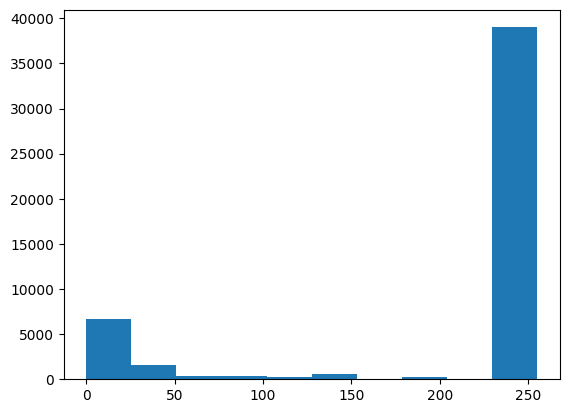

In [ ]:
plt.hist(imnpg_ulbp.flatten())
plt.show()

# PCA

PCA for HOG

In [ ]:
df_hog = pd.read_csv('df_hog.csv', delimiter=',')
df_hog.drop(df_hog.columns[[0]], axis=1, inplace=True)
df_hog

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.380295,0.380295,0.292963,0.379128,0.303414,0.107541,0.251298,0.010032,0.380295,0.037715,...,0.390199,0.046474,0.233878,0.015973,0.390199,0.027568,0.035775,0.021273,0.340056,2
1,0.394803,0.206873,0.147455,0.108167,0.394803,0.139714,0.000000,0.057911,0.394803,0.241238,...,0.287896,0.034573,0.172043,0.019285,0.291089,0.203062,0.162521,0.032089,0.291089,2
2,0.419070,0.036650,0.217775,0.082669,0.398344,0.067366,0.103586,0.000000,0.419070,0.085515,...,0.303503,0.024322,0.188714,0.039620,0.303503,0.182636,0.071425,0.028723,0.303503,2
3,0.400378,0.093742,0.177351,0.014538,0.372775,0.017549,0.114520,0.078092,0.400378,0.006501,...,0.334908,0.042098,0.174415,0.028423,0.334908,0.033139,0.081402,0.033567,0.334908,2
4,0.345899,0.301852,0.263582,0.093908,0.345899,0.153239,0.000000,0.004598,0.345899,0.024577,...,0.371913,0.029269,0.285872,0.027772,0.371913,0.047666,0.044192,0.035399,0.269941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.211070,0.009269,0.122516,0.081728,0.320832,0.016552,0.007206,0.001725,0.320832,0.240504,...,0.376576,0.213513,0.185670,0.007532,0.288786,0.179826,0.125648,0.095836,0.282225,6
209,0.318291,0.021050,0.123684,0.079349,0.331179,0.006926,0.002015,0.004931,0.331179,0.230427,...,0.365462,0.161652,0.126336,0.032262,0.365462,0.021298,0.095652,0.029301,0.365462,6
210,0.331149,0.004511,0.100173,0.068404,0.331149,0.027121,0.004391,0.021314,0.277606,0.101132,...,0.412802,0.000000,0.238647,0.016113,0.412802,0.019397,0.026262,0.082556,0.372193,6
211,0.347660,0.071206,0.056904,0.082255,0.347660,0.020267,0.000000,0.000000,0.329825,0.059921,...,0.394496,0.059645,0.226094,0.035079,0.394496,0.051076,0.062696,0.023729,0.313490,6


In [ ]:
X_pca_hog = df_hog.drop('label', axis=1)  # Include all your feature columns here
y_pca_hog = df_hog['label']

In [ ]:
n_components_hog = int(len(X_pca_hog)*0.9)  # Adjust the number of components as needed
pca = PCA(n_components=n_components_hog)  # For example, reducing to 2 principal components

# Fit PCA to the scaled data
pca.fit(df_hog)

# Transform the data into the new feature space
X_pca_hog = pca.transform(df_hog)

In [ ]:
pca_result = pd.DataFrame(X_pca_hog)
pca_result

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,-1.400502,-1.649618,-1.000981,-1.889660,-0.781874,-1.167061,0.866708,-0.606554,-1.142425,0.320022,...,0.043405,0.246839,-0.007551,0.156350,-0.056255,-0.054582,0.159028,0.041930,0.057624,0.032621
1,-2.001053,-0.859565,-3.163798,-1.760806,-0.661048,0.293708,-0.407629,0.692976,0.528343,2.474603,...,0.299490,-0.326753,-0.000058,0.051869,-0.103769,0.008236,-0.045970,0.100677,0.009320,-0.080169
2,-1.988966,-1.371353,-2.421021,-2.183178,-0.620088,0.022244,-0.466055,0.574534,-0.110690,1.908331,...,-0.350372,0.069498,-0.185023,-0.332469,-0.162921,-0.229317,-0.045478,-0.014939,-0.254897,0.082000
3,-1.904833,-1.333996,-1.610364,-1.470487,-1.357306,0.201580,-0.240211,0.689707,-0.089001,2.007804,...,0.024178,-0.009706,0.187264,0.168823,0.196259,0.133674,0.017086,-0.112872,0.241708,0.243338
4,-0.697758,-1.245823,-1.354540,1.169742,0.889247,-1.373592,-1.574383,1.686022,-0.864722,-0.419979,...,0.214595,0.156517,-0.128180,0.021196,-0.154607,-0.055271,0.081506,-0.171520,0.312972,0.050170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,4.230569,2.952851,0.650585,2.229466,0.112201,-0.364722,2.564339,-1.172031,1.111422,0.298090,...,-0.054355,0.221738,-0.086776,0.193506,-0.148831,-0.002693,0.019646,-0.230004,-0.276059,-0.032827
209,4.704951,2.591980,0.927042,2.808654,0.492213,-0.605872,1.768204,-1.381124,0.908784,-0.115718,...,-0.135705,0.157365,-0.312373,-0.105021,0.107496,0.269697,-0.077475,0.029363,0.275277,0.173993
210,3.605906,-1.851284,-2.026550,0.274066,1.940167,2.664112,0.431430,-0.179325,-0.466116,-0.106945,...,-0.363654,0.077673,0.005438,0.439229,-0.323034,-0.269754,-0.296096,-0.199340,0.334850,-0.245996
211,3.567953,-1.736920,-2.199628,0.323343,2.037188,2.493130,0.319743,-0.171519,-0.286594,-0.015685,...,-0.360385,-0.287115,-0.232939,-0.044477,0.002322,0.338745,0.202665,-0.082191,-0.118037,0.581907


PCA for ULBP

In [ ]:
df_ulbp = pd.read_csv('df_ulbp.csv', delimiter=',')
df_ulbp.drop(df_ulbp.columns[[0]], axis=1, inplace=True)
df_ulbp

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,AN
1,0,0,0,0,0,0,1,1,1,0,...,0,0,0,2,2,2,0,0,0,AN
2,0,0,0,0,0,0,2,2,2,0,...,0,0,0,1,1,1,0,0,0,AN
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,AN
4,1,1,1,1,1,1,0,0,0,2,...,0,0,0,0,0,0,1,1,1,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,2,2,2,0,0,0,0,...,2,2,2,0,0,0,1,1,1,SU
209,0,0,0,2,2,2,0,0,0,0,...,0,0,0,1,1,1,0,0,0,SU
210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,2,2,0,0,0,SU
211,0,0,0,0,0,0,2,2,2,0,...,3,3,3,0,0,0,0,0,0,SU


In [ ]:
# Membuat kamus untuk mengganti label dengan angka sesuai parameter yang ditentukan
parameter = {'NE' : 0,'HA' : 1,'AN' : 2,'DI' : 3,'FE' : 4,'SA' : 5,'SU' : 6}

# Menggunakan metode replace untuk mengganti label dengan angka
df_ulbp['label'] = df_ulbp['label'].replace(parameter)
df_ulbp

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,2
1,0,0,0,0,0,0,1,1,1,0,...,0,0,0,2,2,2,0,0,0,2
2,0,0,0,0,0,0,2,2,2,0,...,0,0,0,1,1,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,2
4,1,1,1,1,1,1,0,0,0,2,...,0,0,0,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,2,2,2,0,0,0,0,...,2,2,2,0,0,0,1,1,1,6
209,0,0,0,2,2,2,0,0,0,0,...,0,0,0,1,1,1,0,0,0,6
210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,2,2,0,0,0,6
211,0,0,0,0,0,0,2,2,2,0,...,3,3,3,0,0,0,0,0,0,6


In [ ]:
X_pca_ulbp = df_ulbp.drop('label', axis=1)  # Include all your feature columns here
y_pca_ulbp = df_ulbp['label']

In [ ]:
X_ulbp = StandardScaler().fit_transform(X_pca_ulbp)
X_ulbp

array([[-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       ...,
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306]])

In [ ]:
n_components_ulbp = int(len(X_pca_ulbp)*0.9)  # Adjust the number of components as needed
pca = PCA(n_components=n_components_ulbp)  # For example, reducing to 2 principal components

# Fit PCA to the scaled data
pca.fit(df_ulbp)

# Transform the data into the new feature space
X_pca_ulbp = pca.transform(df_ulbp)

In [ ]:
pca_result = pd.DataFrame(X_pca_ulbp)
pca_result

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,-1798.264616,1160.216955,-1557.319505,-718.041758,-402.771681,4.953415,783.453928,-732.819379,-508.824172,-1573.561321,...,-564.014275,873.364005,-482.850873,-712.167485,-750.899780,-809.136285,1389.371505,-725.360741,-583.238374,641.315484
1,513.492100,-451.154363,-1244.957948,-874.046828,218.311274,669.189511,-1056.612980,212.757362,-931.957488,399.135297,...,2777.328524,286.799006,15.696738,-1263.511074,829.550587,-198.769754,-1232.415867,-885.574675,-1346.238811,884.968711
2,-1107.792845,822.369321,-2018.876897,-1142.202520,-595.997921,1042.601277,-991.332142,-693.765161,-1194.408010,-45.560403,...,875.685051,-586.721917,1138.991200,92.067166,-723.285616,-330.859393,-1045.580819,2074.454371,1048.773157,1250.704944
3,-924.392823,-188.764767,-2110.324703,-542.314533,-286.220696,-432.471239,-2391.222866,560.632043,-443.353468,-969.054443,...,-932.640235,-60.321273,-1412.808503,2461.400098,1480.651706,-880.781551,-134.371097,-557.857659,755.659620,-403.159331
4,-2233.871790,-2036.401264,2366.142163,-939.073111,-1631.950820,1258.886871,-2337.506974,302.009275,731.470107,-128.649604,...,-152.629865,291.647969,-1823.318252,-357.778419,664.949378,-375.683397,558.478018,384.398140,955.577156,182.761624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,321.882916,-773.142010,-1046.545034,-557.081108,-840.950106,-819.772373,4037.340784,-1602.803001,-2133.420105,632.870246,...,571.104701,1050.733942,-367.802153,834.157959,-118.916280,579.024610,-566.145001,-1553.236264,1329.106680,1375.406619
209,437.078037,-1038.663151,-133.531924,-347.525405,-1157.123382,-1058.854756,4911.871540,-1099.508249,-1155.087015,-631.454298,...,-727.466688,-104.715119,-417.600176,-186.812424,442.424790,-1065.313722,-51.422434,-3.121249,-564.799056,-234.104892
210,-1957.441944,-1829.676486,1935.746810,2334.411725,1928.845050,-1426.491217,1710.248018,-414.214719,1046.443275,-1318.022493,...,725.802688,-822.250556,-2249.043200,998.757908,665.466218,1003.514268,295.295837,-732.269774,-419.294178,-512.360319
211,-2120.011427,-1658.707885,2690.643888,1202.963781,1641.991734,-658.281164,705.333929,495.160431,-2524.652564,-1475.550093,...,-291.194443,310.904999,1224.583553,-361.412346,379.592509,-219.336700,-420.068082,690.230136,-945.253030,-230.121436


# SVM


SVM for HOG

In [ ]:
df_hog = pd.read_csv('df_hog.csv', delimiter=',')
df_hog

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0,0.380295,0.380295,0.292963,0.379128,0.303414,0.107541,0.251298,0.010032,0.380295,...,0.390199,0.046474,0.233878,0.015973,0.390199,0.027568,0.035775,0.021273,0.340056,2
1,1,0.394803,0.206873,0.147455,0.108167,0.394803,0.139714,0.000000,0.057911,0.394803,...,0.287896,0.034573,0.172043,0.019285,0.291089,0.203062,0.162521,0.032089,0.291089,2
2,2,0.419070,0.036650,0.217775,0.082669,0.398344,0.067366,0.103586,0.000000,0.419070,...,0.303503,0.024322,0.188714,0.039620,0.303503,0.182636,0.071425,0.028723,0.303503,2
3,3,0.400378,0.093742,0.177351,0.014538,0.372775,0.017549,0.114520,0.078092,0.400378,...,0.334908,0.042098,0.174415,0.028423,0.334908,0.033139,0.081402,0.033567,0.334908,2
4,4,0.345899,0.301852,0.263582,0.093908,0.345899,0.153239,0.000000,0.004598,0.345899,...,0.371913,0.029269,0.285872,0.027772,0.371913,0.047666,0.044192,0.035399,0.269941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,208,0.211070,0.009269,0.122516,0.081728,0.320832,0.016552,0.007206,0.001725,0.320832,...,0.376576,0.213513,0.185670,0.007532,0.288786,0.179826,0.125648,0.095836,0.282225,6
209,209,0.318291,0.021050,0.123684,0.079349,0.331179,0.006926,0.002015,0.004931,0.331179,...,0.365462,0.161652,0.126336,0.032262,0.365462,0.021298,0.095652,0.029301,0.365462,6
210,210,0.331149,0.004511,0.100173,0.068404,0.331149,0.027121,0.004391,0.021314,0.277606,...,0.412802,0.000000,0.238647,0.016113,0.412802,0.019397,0.026262,0.082556,0.372193,6
211,211,0.347660,0.071206,0.056904,0.082255,0.347660,0.020267,0.000000,0.000000,0.329825,...,0.394496,0.059645,0.226094,0.035079,0.394496,0.051076,0.062696,0.023729,0.313490,6


In [ ]:
df_hog.drop(df_hog.columns[[0]], axis=1, inplace=True)

df_hog

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.380295,0.380295,0.292963,0.379128,0.303414,0.107541,0.251298,0.010032,0.380295,0.037715,...,0.390199,0.046474,0.233878,0.015973,0.390199,0.027568,0.035775,0.021273,0.340056,2
1,0.394803,0.206873,0.147455,0.108167,0.394803,0.139714,0.000000,0.057911,0.394803,0.241238,...,0.287896,0.034573,0.172043,0.019285,0.291089,0.203062,0.162521,0.032089,0.291089,2
2,0.419070,0.036650,0.217775,0.082669,0.398344,0.067366,0.103586,0.000000,0.419070,0.085515,...,0.303503,0.024322,0.188714,0.039620,0.303503,0.182636,0.071425,0.028723,0.303503,2
3,0.400378,0.093742,0.177351,0.014538,0.372775,0.017549,0.114520,0.078092,0.400378,0.006501,...,0.334908,0.042098,0.174415,0.028423,0.334908,0.033139,0.081402,0.033567,0.334908,2
4,0.345899,0.301852,0.263582,0.093908,0.345899,0.153239,0.000000,0.004598,0.345899,0.024577,...,0.371913,0.029269,0.285872,0.027772,0.371913,0.047666,0.044192,0.035399,0.269941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.211070,0.009269,0.122516,0.081728,0.320832,0.016552,0.007206,0.001725,0.320832,0.240504,...,0.376576,0.213513,0.185670,0.007532,0.288786,0.179826,0.125648,0.095836,0.282225,6
209,0.318291,0.021050,0.123684,0.079349,0.331179,0.006926,0.002015,0.004931,0.331179,0.230427,...,0.365462,0.161652,0.126336,0.032262,0.365462,0.021298,0.095652,0.029301,0.365462,6
210,0.331149,0.004511,0.100173,0.068404,0.331149,0.027121,0.004391,0.021314,0.277606,0.101132,...,0.412802,0.000000,0.238647,0.016113,0.412802,0.019397,0.026262,0.082556,0.372193,6
211,0.347660,0.071206,0.056904,0.082255,0.347660,0.020267,0.000000,0.000000,0.329825,0.059921,...,0.394496,0.059645,0.226094,0.035079,0.394496,0.051076,0.062696,0.023729,0.313490,6


In [ ]:
df_hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Columns: 8101 entries, 0 to label
dtypes: float64(8100), int64(1)
memory usage: 13.2 MB


In [ ]:
X_hog = df_hog.drop('label', axis=1)  # Include all your feature columns here
y_hog = df_hog['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_hog, y_hog, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9069767441860465


In [ ]:
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0, 0],
       [1, 6, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0],
       [0, 1, 0, 0, 0, 7, 0],
       [1, 0, 0, 0, 0, 0, 8]], dtype=int64)

SVM form HOG PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_hog, y_pca_hog, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9534883720930233


In [ ]:
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0, 0],
       [1, 6, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 9]], dtype=int64)

SVM for ULBP


In [ ]:
df_ulbp = pd.read_csv('df_ulbp.csv', delimiter=',')
df_ulbp

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,AN
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,2,2,2,0,0,0,AN
2,0,0,0,0,0,0,0,2,2,2,...,0,0,0,1,1,1,0,0,0,AN
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,AN
4,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,1,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,0,2,2,2,0,0,0,...,2,2,2,0,0,0,1,1,1,SU
209,0,0,0,0,2,2,2,0,0,0,...,0,0,0,1,1,1,0,0,0,SU
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,SU
211,0,0,0,0,0,0,0,2,2,2,...,3,3,3,0,0,0,0,0,0,SU


In [ ]:
df_ulbp.drop(df_ulbp.columns[[0]], axis=1, inplace=True)

df_ulbp

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,AN
1,0,0,0,0,0,0,1,1,1,0,...,0,0,0,2,2,2,0,0,0,AN
2,0,0,0,0,0,0,2,2,2,0,...,0,0,0,1,1,1,0,0,0,AN
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,AN
4,1,1,1,1,1,1,0,0,0,2,...,0,0,0,0,0,0,1,1,1,AN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,2,2,2,0,0,0,0,...,2,2,2,0,0,0,1,1,1,SU
209,0,0,0,2,2,2,0,0,0,0,...,0,0,0,1,1,1,0,0,0,SU
210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,2,2,0,0,0,SU
211,0,0,0,0,0,0,2,2,2,0,...,3,3,3,0,0,0,0,0,0,SU


In [ ]:
# Membuat kamus untuk mengganti label dengan angka sesuai parameter yang ditentukan
parameter = {'NE' : 0,'HA' : 1,'AN' : 2,'DI' : 3,'FE' : 4,'SA' : 5,'SU' : 6}

# Menggunakan metode replace untuk mengganti label dengan angka
df_ulbp['label'] = df_ulbp['label'].replace(parameter)
df_ulbp

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,2
1,0,0,0,0,0,0,1,1,1,0,...,0,0,0,2,2,2,0,0,0,2
2,0,0,0,0,0,0,2,2,2,0,...,0,0,0,1,1,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,2
4,1,1,1,1,1,1,0,0,0,2,...,0,0,0,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,2,2,2,0,0,0,0,...,2,2,2,0,0,0,1,1,1,6
209,0,0,0,2,2,2,0,0,0,0,...,0,0,0,1,1,1,0,0,0,6
210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,2,2,0,0,0,6
211,0,0,0,0,0,0,2,2,2,0,...,3,3,3,0,0,0,0,0,0,6


In [ ]:
X_ulbp = df_ulbp.drop('label', axis=1)  # Include all your feature columns here
y_ulbp = df_ulbp['label']

In [ ]:
X_ulbp

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,2,2,0,0,0
1,0,0,0,0,0,0,1,1,1,0,...,1,0,0,0,2,2,2,0,0,0
2,0,0,0,0,0,0,2,2,2,0,...,2,0,0,0,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,1,1
4,1,1,1,1,1,1,0,0,0,2,...,2,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,2,2,2,0,0,0,0,...,0,2,2,2,0,0,0,1,1,1
209,0,0,0,2,2,2,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
210,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,2,2,0,0,0
211,0,0,0,0,0,0,2,2,2,0,...,0,3,3,3,0,0,0,0,0,0


In [ ]:
X_ulbp = StandardScaler().fit_transform(X_ulbp)
X_ulbp

array([[-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       ...,
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306],
       [-0.5287008 , -0.5287008 , -0.5287008 , ..., -0.59970306,
        -0.59970306, -0.59970306]])

In [ ]:
rs = 0
acc = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_ulbp, y_ulbp, test_size=0.2, random_state=i)

    # Create an SVM classifier
    clf = svm.SVC(kernel='linear')

    # Train the SVM classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > acc:
        acc = accuracy
        rs =i

print(f"Accuracy: {acc}, {rs}")

SVM for ULBP PCA

In [ ]:
rs = 0
acc = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_pca_ulbp, y_pca_ulbp, test_size=0.2, random_state=i)

    # Create an SVM classifier
    clf = svm.SVC(kernel='linear')

    # Train the SVM classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > acc:
        acc = accuracy
        rs =i

print(f"Accuracy: {acc}, {rs}")

Accuracy: 0.32558139534883723
